In [ ]:
!pip install qiskit
!pip install qiskit_ibm_provider
!pip install pylatexenc
!pip install --upgrade qiskit[visualization]
!pip install qiskit_ibm_runtime

In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-transpiler-service
!pip install qiskit_aer
!pip install qiskit_ibm_runtime

In [ ]:
!pip install matplotlib

 In general, $2+3/2log_2 N$ qubits are needed to factor the composite integer N, meaning at least 1154 qubits would be needed to factor RSA-768above.

The number theory that underlines Shor's algorithm relates to periodic modulo sequences.

Example (Power of 2's):

$[1,2,4,8,16,32,64,128,256,512,1024]$

mod all by 15

$[1mod15,2mod15,4mod15,8mod15,16mod15,32mod15,64mod15,128mod15,256mod15,512mod15,1024mod15] = [1,2,4,8,1,2,4,8,1,2,4]$

We can see that there is a periodic sequence of four [1,2,4,8]





Normal Schors Algorithm:

Assume N has only 2 distinct primes
$N = pq$

1. pick a random integer between 1->N.
2. Compute gcd(x,N) using euclidian algorithm
3. Find where x and N are coprime (i.e. gcd(x,N))
4. Using a period finding algorithm find for which x's the period (r) is even (brute force)
5. compute p and q: $gcd(x^{r/2}\pm 1, N)$ as long as $x^{r/2}\neq\pm1$

| x  | $( x^a \mod 15 )  $              | Period \( r \) | $( \text{gcd}(x^{r/2}-1,15)$ | $( \text{gcd}(x^{r/2} + 1, 15)$ |
|----|----------------------------------|----------------|------------------------------------|------------------------------------|
|----|---------------------------------|------------|----------------------------------|-----------------------------------|
| 2  | 1, 2, 4, 8, 1, 2, 4, 8, ...     | 4          | 3                        | 5                        |
| 4  | 1, 4, 1, 4, 1, 4, 1, 4, ...     | 2          | 3                        | 5                        |
| 7  | 1, 7, 4, 13, 1, 7, 4, 13, ...   | 4          | 3                        | 5                        |
| 8  | 1, 8, 4, 2, 1, 8, 4, 2, ...     | 4          | 3                        | 5                        |
| 11 | 1, 11, 1, 11, 1, 11, 1, 11, ... | 2          | 5                        | 3                        |
| 13 | 1, 13, 4, 7, 1, 13, 4, 7, ...   | 4          | 3                        | 5                        |


## Shors Algorithm Classically computated

In [ ]:
import random


def shor_find_order_classical(a: int, product: int) -> int:
    exp = 1
    for r in range(1, product):
        exp *= a
        exp %= product
        if exp == 1:
            return r
    raise "Shor Classical Failed"


def shor_find_factor(product):
    # https://en.wikipedia.org/wiki/Shor%27s_algorithm
    if product % 2 == 0:
        return 2
    while True:
        # Pick a random number 1 < a < N {\displaystyle 1<a<N}.
        a = random.randrange(2, product - 1)
        print(f"Trying shor again, a={a}")
        K = gcd(a, product)
        if K != 1:
            return K
        # print(f"K is {K}")
        r = shor_find_order_classical(a, product)
        # print(f"R is {r}")
        # If r {\displaystyle r} is odd, then go back to step 1.
        if r % 2 == 1:
            # print("R is odd")
            continue
        # Compute g = gcd ( N , a r / 2 + 1 ) {\displaystyle g=\gcd(N,a^{r/2}+1)}. If g {\displaystyle g} is nontrivial, the other factor is N g {\textstyle {\frac {N}{g}}}, and we're done. Otherwise, go back to step 1.
        g = gcd(product, a ^ int(r / 2) + 1)
        # print(f"g is {g}")
        # Is g trivial
        if g == 1 or g == product:
            # print("g is so trivial")
            continue
        return g


def gcd(a: int, b: int) -> int:
    while a != 0:
        c = a
        a = b % a
        b = c
    return b


def find_factor(product: int) -> int:
    """
    :param product:
    :return: A factor of param, or -1 if prime
    """
    if product < 2:
        raise ":("

    for a in range(2, product):
        for b in range(a, product):
            if a * b == product:
                return a
    return -1


if __name__ == '__main__':
    find = 227119 # 49414657
    print(f"A factor is {find_factor(find)}")
    print(f"GCD is {gcd(116158341, 2009136727)}")
    print(f"shors {shor_find_factor(find)}")

A factor is 383
GCD is 13
Trying shor again, a=161428
Trying shor again, a=77703
Trying shor again, a=106959
Trying shor again, a=66299
Trying shor again, a=9605
Trying shor again, a=159426
Trying shor again, a=156451
Trying shor again, a=166925
Trying shor again, a=146710
Trying shor again, a=28589
Trying shor again, a=45248
Trying shor again, a=37323
Trying shor again, a=68370
Trying shor again, a=117577
Trying shor again, a=123226
Trying shor again, a=80209
Trying shor again, a=114819
Trying shor again, a=5598
Trying shor again, a=61452
Trying shor again, a=4103
Trying shor again, a=25922
Trying shor again, a=37775
Trying shor again, a=216496
Trying shor again, a=179627
shors 383


# Shors Algorithm Quantum

Using a quantum Fourier Transform (QFT) to the period register the period (r) of $a^X mod N$ can be found. (Note: unlike the classical  Shors algorithm by using quantum circuits the number of measurements does not increase with additional numbers to be factored)

1. Use quantum phase estimation with Unitary (U) representing the operation of multiplying by a (mod N)

2. Measure a phase $\phi=s/r$

3. use the continued fractions algorithm to extract the period r from the measurement for the "best outcomes"

4. Compute p and q

Note:

There are many implementations of  for Shors Algorithm. From [Realization of a scalable Shor algorithm](https://www.science.org/doi/pdf/10.1126/science.aad9480?casa_token=ewiqpCcOhL0AAAAA:U4vt3KnSRS63pYx9HOXWJoACk2D0MtxCvoVvNwgfW7ES7jmlrqoUvZ8Xm1_A4PXwpWjb04FeydL4ywQ)



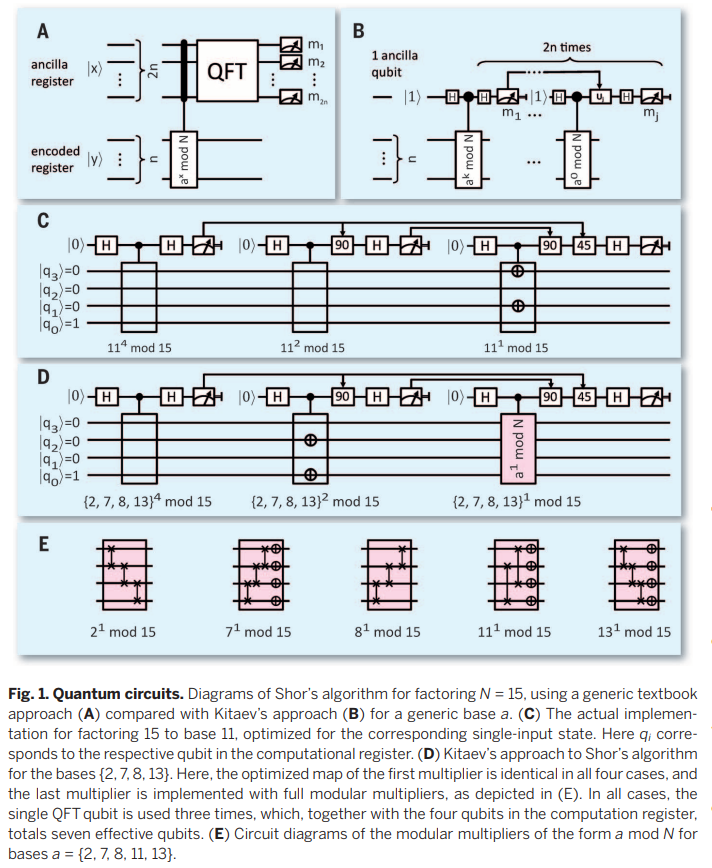

We will be implementing Kitaev's approach for N=15 as that is the most well documented as well as the complexity required to set up the code. It is not feasible for this project to set up Shors for more than one N.

[phase estimation qiskit source](https://github.com/Qiskit/qiskit/blob/stable/1.0/qiskit/circuit/library/phase_estimation.py)

[instructions](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseEstimation#phaseestimation)

## Imports and Globals

In [213]:
#!pip install xlsxwriter
import xlsxwriter
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
import math
from random import randint
from fractions import Fraction
import os

Counts = 0
A = 0
Ran_Quantum_period_finding = 0
global m
m = 0



## Create the Unitary Operator

In [196]:
def cmod(qc, qr, a_mod_N, a):
# Construct unitary based on a and assumed N=15
  if a == 2:
    qc.cswap(qr[4],qr[3],qr[2])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[1],qr[0])
  if a == 4 or a == 11 or a == 14:
    qc.cswap(qr[4],qr[2],qr[0])
    qc.cswap(qr[4],qr[3],qr[1])
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[1])
    qc.cx(qr[4],qr[0])
  if a == 7:
    qc.cswap(qr[4],qr[1],qr[0])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[3],qr[2])
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[1])
    qc.cx(qr[4],qr[0])
  if a == 8:
    qc.cswap(qr[4],qr[1],qr[0])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[3],qr[2])
  if a == 13:
    qc.cswap(qr[4],qr[3],qr[2])
    qc.cswap(qr[4],qr[2],qr[1])
    qc.cswap(qr[4],qr[1],qr[0])
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[1])
    qc.cx(qr[4],qr[0])


## Quantum Fourier Transform

use qiskit QFT

qiskit.circuit.library.QFT(num_qubits=None, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name=None)

## Function Finder

In [217]:
def period(a, N):
    global R
    n_qubits = 5
    qr = QuantumRegister(n_qubits, 'q')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qr, cr)

    # Initialize qr[0] to |1>
    qc.x(qr[0])

    # Apply H-gate to the last qubit
    qc.h(qr[4])

    # Step one: Apply a**4 mod 15
    cmod(qc, qr, a**4 % N,a)
    qc.h(qr[4])
    qc.measure(qr[4], cr[0])
    qc.reset(qr[4])

    # Step two: Apply a**2 mod 15
    qc.h(qr[4])
    # Assuming 'cmod' is applied twice for a**2 mod 15
    for _ in range(2):
        cmod(qc, qr, a**2 % N,a)
    # Conditional phase based on measurement
    if cr[0] == 1:
        qc.p(pi/2, qr[4])
    qc.h(qr[4])
    qc.measure(qr[4], cr[1])
    qc.reset(qr[4])

    # Step three: Apply a mod 15
    qc.h(qr[4])
    cmod(qc, qr, a % N,a)
    if cr[1] == 1:
        qc.p(pi/2, qr[4])
    if cr[0] == 1:
        qc.p(pi/4, qr[4])
    qc.h(qr[4])
    qc.measure(qr[4], cr[2])

    #qc.draw(output='mpl', filename='quantum_circuit.png')

    # Execute the circuit on the AerSimulator
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1)
    result = job.result()

    counts = result.get_counts(qc)
    measured_str = list(counts.keys())[0]
    measured_int = int(measured_str, 2)
    print(f"Measured: {measured_int}")

    phi = measured_int / 2**n_qubits

    # Try to find r through continued fraction expansion of phi
    for r in range(1, N+1):
        if Fraction(phi).limit_denominator(N).denominator == r:
            print(f"Period found: {r}")
            return r
    print("No period found.")
    return None

## Factor

In [198]:
def Factorize_N(N):
	factors = [0,0]
# Step 1 : Determine the number of bits based on N; n = [log2(N)]
	n = math.ceil(math.log(N,2))
# Step 2 : Check if N is even. In that case return 2 and the remaining number as factors
	if N % 2 == 0:
		factors = [2,N/2]
		return factors
# Step 4 : Choose a random number between 2...(N-1).
	while True:
		a = randint(2,N-1)
		global A
		A = a
# Step 5 : Take GCD of a and N. t = GCD(a,N)
		t = gcd(N,a)
		if t > 1:
			factors = [t,N/t]
			return factors
# Step 6 : t = 1.Find Period using Shor's method
		r = period(a,N)
		if (r%2 == 0) and (((a**(r/2))+1)%N != 0) and (r != 0) and (r != 8):
			break
		global Counts
		Counts = Counts + 1
	factor_1 = gcd((a**(r/2))+1,N)
	factor_2 = N/factor_1
	factors = [factor_1,factor_2]
	return factors


## Shors Main

Prints out the prime factors as well as exports to a xls file

In [218]:
def main():
    N = 15
    factors_list = []

    # Initialize Excel workbook and worksheet
    wb = xlsxwriter.Workbook('log.xlsx')
    ws = wb.add_worksheet('Data')
    header_format = wb.add_format({'bold': True, 'border': 1})
    border_format = wb.add_format({'border': 1})

    # Write column headers
    headers = ['A', 'Factor 1', 'Factor 2']
    for col, header in enumerate(headers):
        ws.write(0, col, header, header_format)

    for m in range(1, 101):
        factors_found = Factorize_N(N)
        factors_list.append(factors_found)

        # Write the factors found for this run into the Excel sheet
        ws.write(m, 0, A, border_format)
        ws.write(m, 1, factors_found[0], border_format)
        ws.write(m, 2, factors_found[1], border_format)


        print(f"Run {m}: The Number being factorized is {N}")
        print(f"Factors are = {factors_found}")
        print(f"A = {A}")
        print(f"Counts = {Counts}")
        print()

    wb.close()
    print("Results saved to 'log.xlsx'.")

if __name__ == '__main__':
    main()


Run 1: The Number being factorized is 15
Factors are = [3, 5.0]
A = 3
Counts = 0

Run 2: The Number being factorized is 15
Factors are = [3, 5.0]
A = 9
Counts = 0

Measured: 5
Period found: 13
Run 3: The Number being factorized is 15
Factors are = [5, 3.0]
A = 5
Counts = 1

Measured: 3
Period found: 11
Measured: 0
Period found: 1
Run 4: The Number being factorized is 15
Factors are = [3, 5.0]
A = 9
Counts = 3

Run 5: The Number being factorized is 15
Factors are = [5, 3.0]
A = 5
Counts = 3

Measured: 3
Period found: 11
Run 6: The Number being factorized is 15
Factors are = [5, 3.0]
A = 5
Counts = 4

Measured: 5
Period found: 13
Measured: 5
Period found: 13
Run 7: The Number being factorized is 15
Factors are = [3, 5.0]
A = 9
Counts = 6

Measured: 0
Period found: 1
Measured: 0
Period found: 1
Run 8: The Number being factorized is 15
Factors are = [5, 3.0]
A = 5
Counts = 8

Measured: 5
Period found: 13
Measured: 0
Period found: 1
Measured: 5
Period found: 13
Run 9: The Number being facto

# Attempt at using the Quantum Phase Estimation tool form Qiskit's newest update to implement Schors Algorithm

## Quantum Phase Estimation

[QPE Notebook](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-phase-estimation.ipynb)

$ U|\psi\rangle = e^{2\pi i\phi} |\psi\rangle$

$|\psi\rangle$ is an eigenvector and $e^{2\pi i\phi}$ is the corresponding eigenvalue

In [40]:
from qiskit_ibm_provider import IBMProvider
from qiskit.circuit.library import PhaseEstimation, QFT, IntegerComparator
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.visualization.library import _generate_circuit_library_visualization
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit import transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import Aer


token = 'f0113ac1d30d90b2868282a463ed45b4fb28ab8b9573c3a131484daf93d9e24f2f2708e1033cb1ea3cc39ba411d2cba84727feae6ce8725d27f6080ccbddac03'

print('\n Phase Estimation')
print('--------------------')

#create the unitary
unitary = QuantumCircuit(3)
unitary.x(0)
unitary.y(1)
#applies hadamard on eval qubits
#composes phase estimation circuit
#per default the inverse QFT is performed
circuit = PhaseEstimation(num_evaluation_qubits=3, unitary=unitary,iqft=None)
circuit.draw()



 Phase Estimation
--------------------


┌──────┐
eval_0: ┤0     ├
        │      │
eval_1: ┤1     ├
        │      │
eval_2: ┤2     ├
        │  QPE │
   q_0: ┤3     ├
        │      │
   q_1: ┤4     ├
        │      │
   q_2: ┤5     ├
        └──────┘

In [ ]:
service = QiskitRuntimeService(channel='ibm_quantum', token=token)
backend = service.backend("ibmq_qasm_simulator")

transpiled_circuits = transpile(circuit, backend=backend, optimization_level=0)
#sampler = Sampler(backend)
#estimator = Estimator(backend)
job = Estimator.run([transpiled_circuits,])
print(f"job id: {job.job_id()}")
job_result = job.result()[0]
print(f"job status: {job_result.status()}")

transpiled_circuits.draw()

In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

service = QiskitRuntimeService(channel='ibm_quantum', token=token)
backend = service.least_busy(operational=True, simulator=False)

psi = RealAmplitudes(num_qubits=2, reps=2)
hamiltonian = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
theta = [0, 1, 1, 2, 3, 5]

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_psi = pm.run(psi)
isa_observables = hamiltonian.apply_layout(isa_psi.layout)

estimator = Estimator(backend=backend)

# calculate [ <psi(theta1)|hamiltonian|psi(theta)> ]
job = estimator.run([(isa_psi, isa_observables, [theta])])
pub_result = job.result()[0]
print(f"Expectation values: {pub_result.data.evs}")